# LGM Virtual Internship Program October Batch 2022

# Task4 : Develop a Neural Network That Can Read Handwriting

level: Advance level task

Language: Python

# Importing Required Libraries

In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# Dataset

In [2]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 5s 0us/step


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

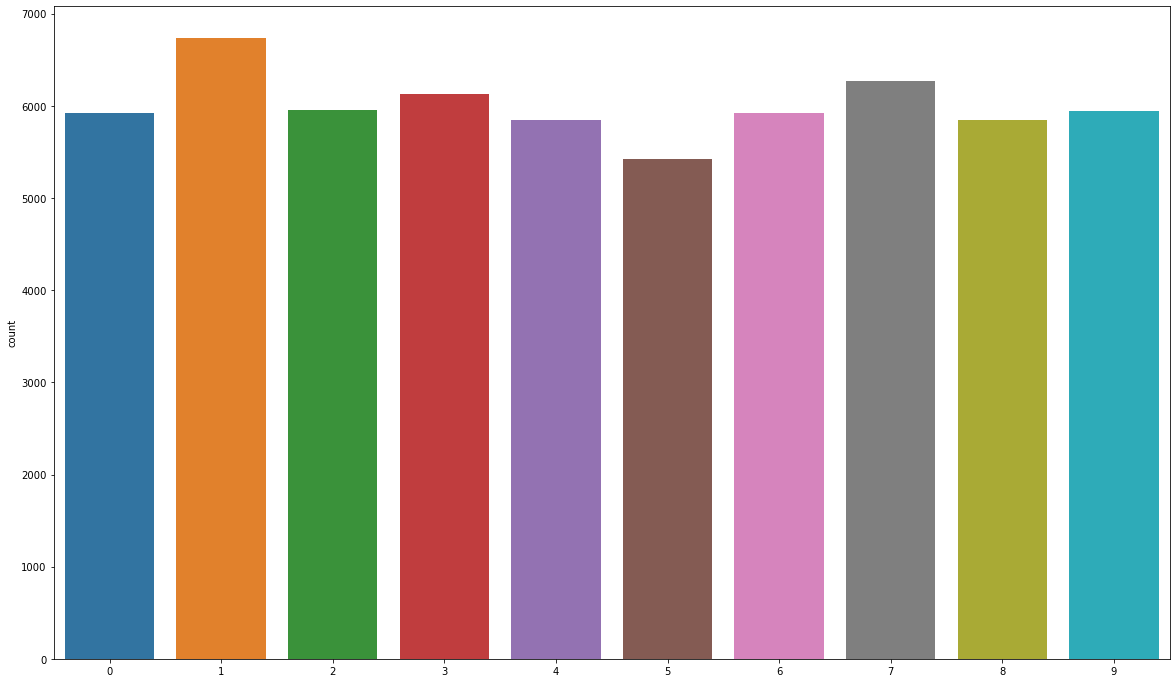

In [40]:
plt.figure(figsize = (20,12))
sns.countplot(y_train)

# Visualizing Images

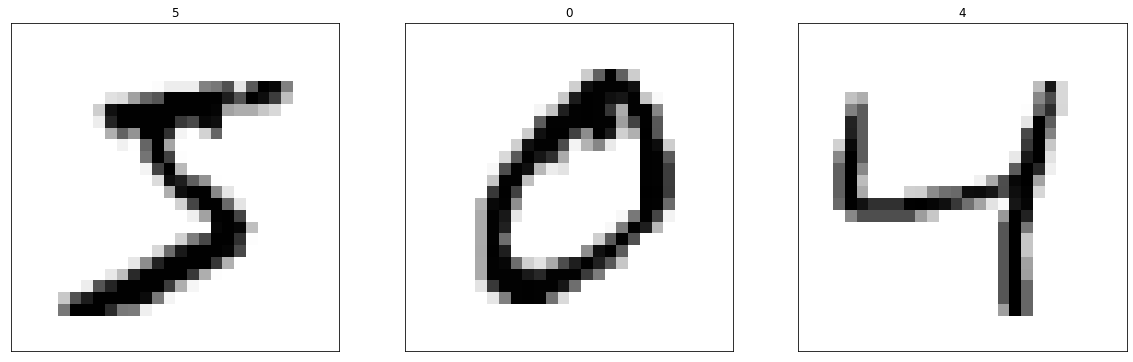

In [38]:
fig, axes = plt.subplots(ncols=3, sharex=False,
    sharey=True, figsize=(20, 14))
for i in range(3):
    axes[i].set_title(y_train[i])
    axes[i].imshow(x_train[i], cmap='gray_r')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()   

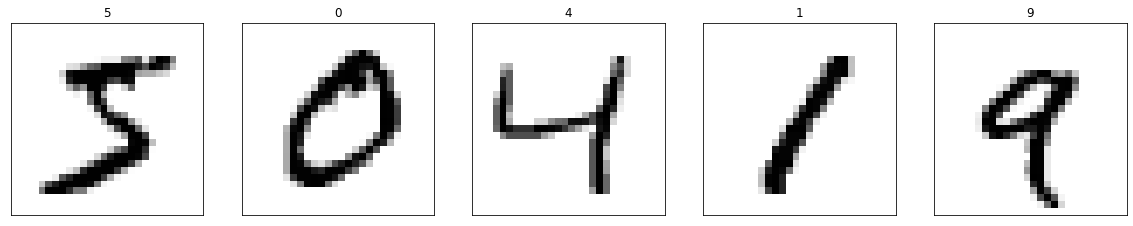

In [46]:
fig, axes = plt.subplots(ncols=5, sharex=True,
    sharey=True, figsize=(20, 14))
for i in range(5):
    axes[i].set_title(y_train[i])
    axes[i].imshow(x_train[i], cmap='gray_r')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show() 

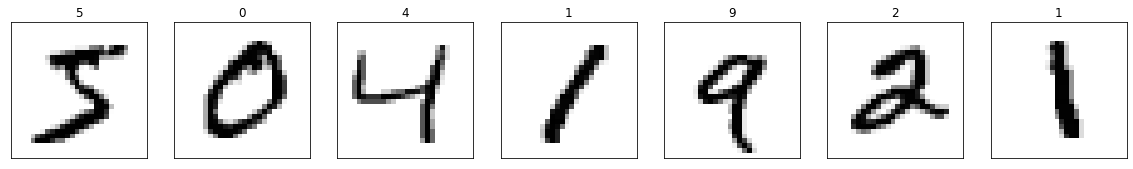

In [48]:
fig, axes = plt.subplots(ncols=7, sharex=True,
    sharey=True, figsize=(20, 14))
for i in range(7):
    axes[i].set_title(y_train[i])
    axes[i].imshow(x_train[i], cmap='gray_r')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

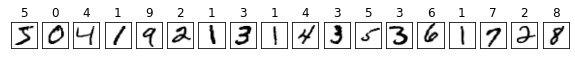

In [49]:
fig, axes = plt.subplots(ncols=18, sharex=False,
    sharey=True, figsize=(10, 4))
for i in range(18):
    axes[i].set_title(y_train[i])
    axes[i].imshow(x_train[i], cmap='gray_r')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()    

In [5]:
print('Training images shape: ',x_train.shape)
print('Testing images shape: ',x_test.shape)

Training images shape:  (60000, 28, 28)
Testing images shape:  (10000, 28, 28)


In [6]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [7]:
x_train=x_train/255.0
x_testg=x_test/255.0
num_classes = 10

# Creating Model

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten,Activation
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.layers import BatchNormalization

In [11]:
model = Sequential()

model.add(Conv2D(128, kernel_size=(3, 3),
                 activation=tf.nn.relu,
                 input_shape=input_shape))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), activation=tf.nn.relu))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(32, (3, 3), activation=tf.nn.relu))
model.add(BatchNormalization())
model.add(Dropout(0.3))


model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation=tf.nn.softmax))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 128)       1280      
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 128)      512       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 26, 26, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        73792     
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 64)       256       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 24, 24, 64)        0

In [13]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
history=model.fit(x=x_train,
                 y=y_train,
                 validation_split=0.1,
                 epochs=10)

Epoch 1/10
1688/1688 [==============================] - 475s 279ms/step - loss: 0.2546 - accuracy: 0.9258 - val_loss: 0.0712 - val_accuracy: 0.9827
Epoch 2/10
1688/1688 [==============================] - 738s 437ms/step - loss: 0.1112 - accuracy: 0.9673 - val_loss: 0.1377 - val_accuracy: 0.9777
Epoch 3/10
1688/1688 [==============================] - 440s 261ms/step - loss: 0.0874 - accuracy: 0.9756 - val_loss: 0.1006 - val_accuracy: 0.9835
Epoch 4/10
1688/1688 [==============================] - 313s 185ms/step - loss: 0.0743 - accuracy: 0.9781 - val_loss: 0.1415 - val_accuracy: 0.9793
Epoch 5/10
1688/1688 [==============================] - 622s 369ms/step - loss: 0.0655 - accuracy: 0.9813 - val_loss: 0.0615 - val_accuracy: 0.9908
Epoch 6/10
1688/1688 [==============================] - 1465s 868ms/step - loss: 0.0549 - accuracy: 0.9839 - val_loss: 0.0785 - val_accuracy: 0.9870
Epoch 7/10
1688/1688 [==============================] - 311s 185ms/step - loss: 0.0520 - accuracy: 0.9848 - val

# Saving the Model

In [14]:
model.save('MNproject.h5')

In [15]:
from tensorflow.keras.models import load_model
model = load_model('MNproject.h5')

In [16]:
loss_and_acc=model.evaluate(x_test,y_test)
print("Test Loss", loss_and_acc[0])
print("Test Accuracy", loss_and_acc[1])

313/313 [==============================] - 8s 26ms/step - loss: 2.5613 - accuracy: 0.9883
Test Loss 2.5613391399383545
Test Accuracy 0.9883000254631042


# Plotting

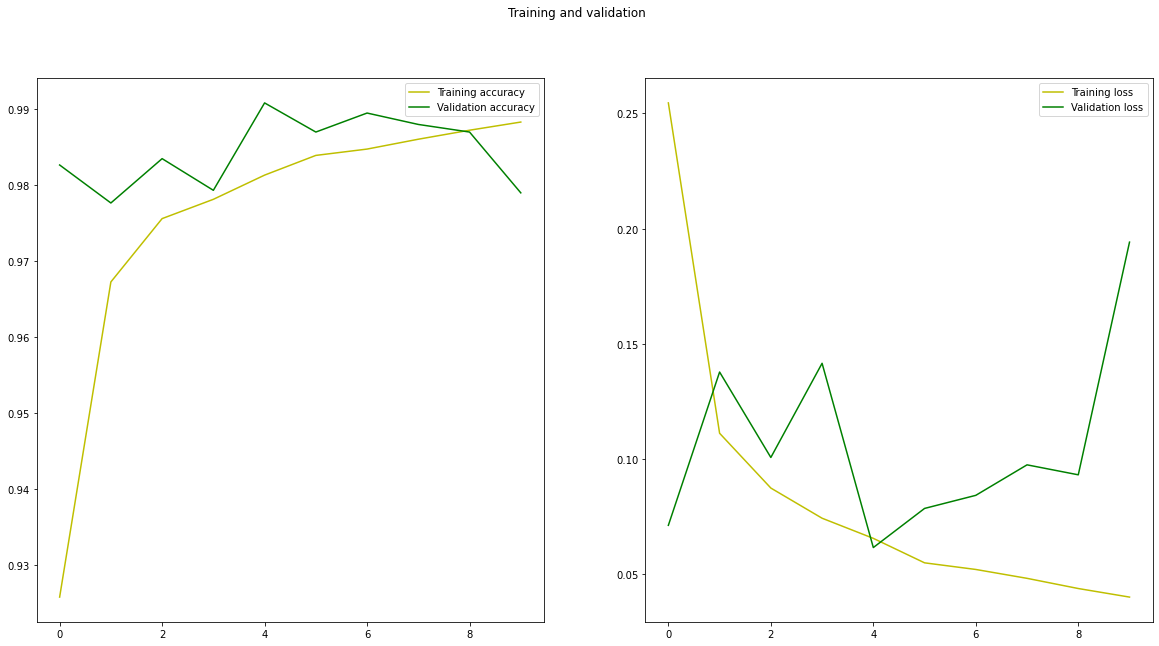

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
ax[0].plot(epochs, acc, 'y', label='Training accuracy')
ax[0].plot(epochs, val_acc, 'g', label='Validation accuracy')
ax[0].legend(loc=0)
ax[1].plot(epochs, loss, 'y', label='Training loss')
ax[1].plot(epochs, val_loss, 'g', label='Validation loss')
ax[1].legend(loc=0)

plt.suptitle('Training and validation')
plt.show()

In [25]:
y_predicted = model.predict(x_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

313/313 [==============================] - 10s 25ms/step


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 976,    0,    0,    0,    0,    0,    3,    1,    0,    0],
       [   3, 1126,    1,    1,    0,    0,    3,    0,    1,    0],
       [   1,    1, 1027,    0,    0,    0,    0,    2,    1,    0],
       [   0,    0,    3,  994,    0,    4,    0,    5,    3,    1],
       [   0,    0,    0,    0,  980,    0,    0,    0,    1,    1],
       [   0,    0,    0,    9,    0,  877,    4,    1,    0,    1],
       [   1,    1,    1,    1,    1,    1,  951,    0,    1,    0],
       [   0,    6,   10,    0,    6,    0,    0, 1003,    2,    1],
       [   1,    0,    1,    1,    1,    1,    2,    0,  965,    2],
       [   0,    2,    0,    0,    9,    6,    0,    2,    6,  984]])>

# Testing Model

313/313 [==============================] - 7s 22ms/step
Predicted Value:  5
PREDICTED SUCCESSFULLY


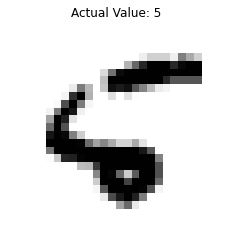

In [27]:
plt.imshow(x_test[8],cmap='gray_r')
plt.title('Actual Value: {}'.format(y_test[8]))
prediction=model.predict(x_test)

plt.axis('off')
print('Predicted Value: ',np.argmax(prediction[8]))
if(y_test[8]==(np.argmax(prediction[8]))):
  print('PREDICTED SUCCESSFULLY')
else:
  print('ERROR IN PREDICTING')

The model predict above image as 5 which is same as actual value

313/313 [==============================] - 7s 22ms/step
Predicted Value:  2
PREDICTED SUCCESSFULLY


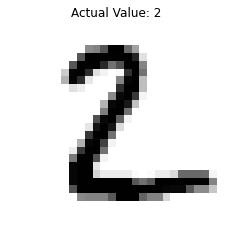

In [29]:
plt.imshow(x_test[1],cmap='gray_r')
plt.title('Actual Value: {}'.format(y_test[1]))
prediction=model.predict(x_test)
plt.axis('off')
print('Predicted Value: ',np.argmax(prediction[1]))
if(y_test[1]==(np.argmax(prediction[1]))):
  print('PREDICTED SUCCESSFULLY')
else:
  print('ERROR IN PREDICTING')

The model predict above image as 2 which is same as actual value

313/313 [==============================] - 7s 22ms/step
Predicted Value:  4
PREDICTED SUCCESSFULLY


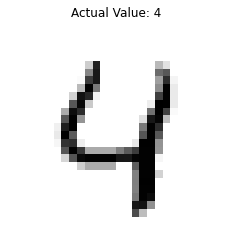

In [30]:
plt.imshow(x_test[4],cmap='gray_r')
plt.title('Actual Value: {}'.format(y_test[4]))
prediction=model.predict(x_test)
plt.axis('off')
print('Predicted Value: ',np.argmax(prediction[4]))
if(y_test[4]==(np.argmax(prediction[4]))):
  print('PREDICTED SUCCESSFULLY')
else:
  print('ERROR IN PREDICTING')

The model predict above image as 4 which is correct

313/313 [==============================] - 7s 22ms/step
Predicted Value:  9
PREDICTED SUCCESSFULLY


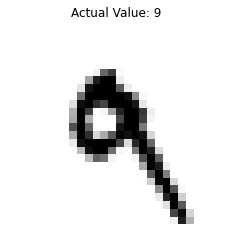

In [31]:
plt.imshow(x_test[7],cmap='gray_r')
plt.title('Actual Value: {}'.format(y_test[7]))
prediction=model.predict(x_test)
plt.axis('off')
print('Predicted Value: ',np.argmax(prediction[7]))
if(y_test[7]==(np.argmax(prediction[7]))):
  print('PREDICTED SUCCESSFULLY')
else:
  print('ERROR IN PREDICTING')

The model predict above image as 9 which is correct

# It means our trained model is showing correct number for handwritting